In [2]:
using TrajectoryOptimization
using MeshCatMechanisms
using Plots
using RigidBodyDynamics

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/58882e29050e18d632e3753ade461bb1c0e26c48-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/58882e29050e18d632e3753ade461bb1c0e26c48-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

INFO: Loading HttpServer methods...


In [46]:
state = Dynamics.cartpole_mechanism
vis = MechanismVisualizer(state,URDFVisuals(Dynamics.urdf_cartpole));
model, obj = Dynamics.cartpole_analytical

obj.x0 = [0;0;0;0.]
obj.xf = [0.5;pi;0;0]
obj.tf = 2.
u_bnd = 50
x_bnd = [0.6,Inf,Inf,Inf]
dt = 0.1
obj_con = ConstrainedObjective(obj,u_min=-u_bnd, u_max=u_bnd, x_min=-x_bnd, x_max=x_bnd);

# iLQR
## Infeasible Start

In [47]:
solver = Solver(model,obj_con,dt=0.1)
U = ones(1,solver.N)*10
X = line_trajectory(obj.x0, obj.xf, solver.N)
solver.opts.verbose = true
@time results = solve(solver,X,U);

Solving Constrained Problem with Infeasible Start...
Outer loop 1 (begin)
Cost (1): 27469.29699979834

--Iteration: 1-(1)--
New cost: 7037.02476133564
- Max constraint violation: 1.1130603645033534
- Expected improvement: 34229.79872615344
- Actual improvement: 20432.272238462698
- (z = 0.5969147642942849)

--Iteration: 1-(2)--
New cost: 1075.6142162059102
- Max constraint violation: 41.18275110868488
- Expected improvement: 21021.45353859175
- Actual improvement: 5961.410545129729
- (z = 0.2835869809947067)

--Iteration: 1-(3)--
New cost: 64.45826685118199
- Max constraint violation: 0.03839316243963384
- Expected improvement: 3107.204629884426
- Actual improvement: 1011.1559493547283
- (z = 0.3254230312447554)

--Iteration: 1-(4)--
New cost: 18.86830368554084
- Max constraint violation: 0.07811038567791473
- Expected improvement: 144.47573499298704
- Actual improvement: 45.58996316564115
- (z = 0.3155544643386249)

--Iteration: 1-(5)--
New cost: 16.727095351681466
- Max constraint vi

New cost: 20.581795541751234
- Max constraint violation: 0.012495910516963953
- Expected improvement: 2.4186831241805906e-14
- Actual improvement: 1.0658141036401503e-14
- (z = 0.440658841575715)

--iLQR (inner loop) cost eps criteria met at iteration: 2

Outer loop 8 (end)

Outer loop 9 (begin)
Cost (9): 21.236770856002384

--Iteration: 9-(1)--
New cost: 21.211156386494288
- Max constraint violation: 0.011109923225662729
- Expected improvement: 0.4949730075259971
- Actual improvement: 0.02561446950809554
- (z = 0.05174922494485764)

--Iteration: 9-(2)--
New cost: 21.211156386494277
- Max constraint violation: 0.01110992322566137
- Expected improvement: 3.480288771609459e-13
- Actual improvement: 1.0658141036401503e-14
- (z = 0.03062430084349767)

--iLQR (inner loop) cost eps criteria met at iteration: 2

Outer loop 9 (end)

Outer loop 10 (begin)
Cost (10): 21.782165311161023

--Iteration: 10-(1)--
New cost: 21.759694417085917
- Max constraint violation: 0.00946477306503486
- Expected 

New cost: 24.418613028102392
- Max constraint violation: 0.0014108616343883468
- Expected improvement: 0.03106714322589012
- Actual improvement: 0.0011782136721762981
- (z = 0.03792475103389686)

--iLQR (inner loop) cost eps criteria met at iteration: 1

Outer loop 33 (end)

Outer loop 34 (begin)
Cost (34): 24.44644873938151

--Iteration: 34-(1)--
New cost: 24.445866556289353
- Max constraint violation: 0.0014096735667505507
- Expected improvement: 0.007448191714284321
- Actual improvement: 0.0005821830921561855
- (z = 0.07816435377726123)

--iLQR (inner loop) cost eps criteria met at iteration: 1

Outer loop 34 (end)

Outer loop 35 (begin)
Cost (35): 24.47455977401179

--Iteration: 35-(1)--
New cost: 24.474501212524203
- Max constraint violation: 0.0014095183341752103
- Expected improvement: 0.0004559198562251177
- Actual improvement: 5.856148758809354e-5
- (z = 0.12844688992702671)

--iLQR (inner loop) cost eps criteria met at iteration: 1

Outer loop 35 (end)

Outer loop 36 (begin)


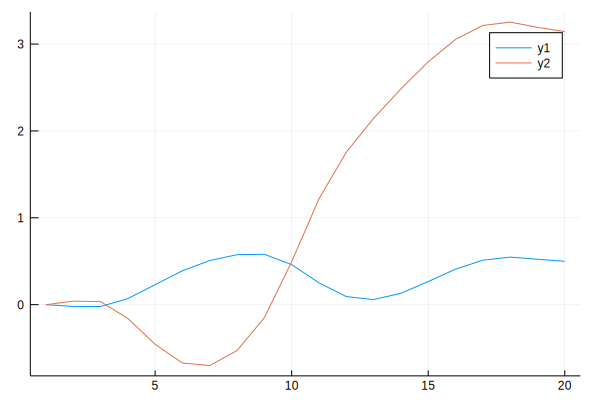

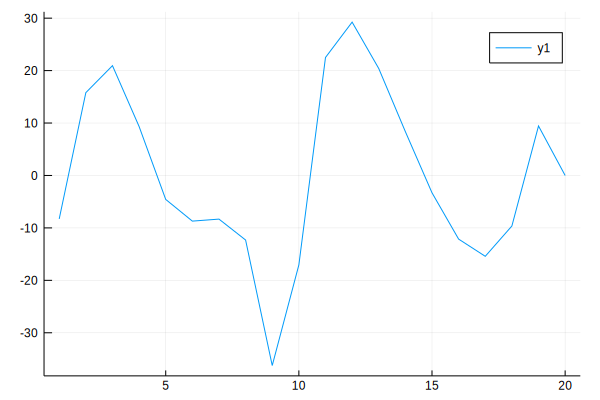

In [48]:
p = plot(results.X[1:2,:]'); display(p)
plot(results.U')

In [6]:
IJuliaCell(vis)

WebIO.Scope("scope-8943b511-683e-4ab9-92e2-7236d276849c", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict{String,Any}(Pair{String,Any}("height", "100%"),Pair{String,Any}("scrolling", "no"),Pair{String,Any}("src", "javascript:void(0)"),Pair{String,Any}("frameborder", 0))),Pair{Symbol,Any}(:id, "ifr"),Pair{Symbol,Any}(:style, Dict("width"=>"100%","flexGrow"=>"1"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:style, Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden"))), 1), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(), Set{String}(), nothing, Any[], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Determine if we're running on a Jupyter hosting service\n    // that requires a base URL when retrieving assets\n    var curMatch =\n        window.location.href\n        .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n    curMatch = curMatch ||\n        window.location.href\n        .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n    if (curMatch) {\n        var base = doc.createElement(\"base\");\n        base.setAttribute(\"href\", curMatch[1] + '/');\n        doc.head.appendChild(base);\n    }\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"pkg/WebIO/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/905e7b4691b209d55b90b721d3060c2b6059cd06-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-36f6f413-ff0d-4925-b7e8-2e53386066bb&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-36f6f413-ff0d-4925-b7e8-2e53386066bb&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); return window.document.body.style.margin=&quot;0&quot;})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[131,166,109,97,116,114,105,120,199,64,23,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,164,116,121,112,101,173,115,101,116,95,116,114,97,110,115,102,111,114,109,164,112,97,116,104,218,0,33,47,109,101,115,104,99,97,116,47,119,111,114,108,100,47,115,108,105,100,101,66,97,114,47,99,97,114,116,47,112,111,108,101]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;c

In [8]:
for i = 1:size(X,2)
    x = [results.X[1,i],pi-results.X[2,i]]
    set_configuration!(state, x)
    set_configuration!(vis, configuration(state))
    sleep(dt)
end

# Direct Collocation

In [33]:
grads = :auto       # Use ForwardDiff
grads = :none       # Let SNOPT figure it out
grads = :quadratic  # Specify special structure for quadratic costs

method = :trapezoid
# method = :hermite_simpson_separated

x_opt, u_opt, f_opt = TrajectoryOptimization.dircol(model, obj_con, 0.1, method=method, grads=grads);

Passing Problem to SNOPT...
  0.314625 seconds (1.24 M allocations: 79.710 MiB, 8.45% gc time)
  0.112082 seconds (474.69 k allocations: 45.971 MiB, 11.76% gc time)
Finished successfully: optimality conditions satisfied


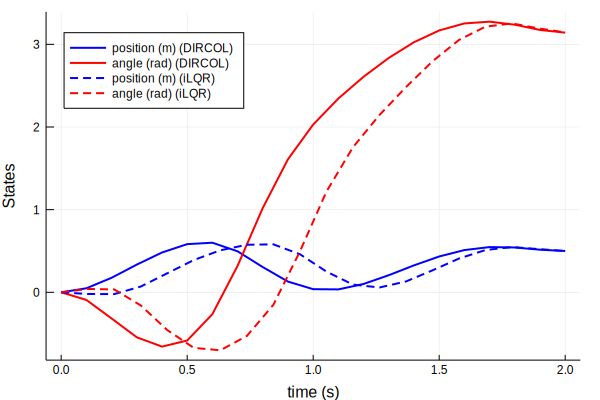

In [34]:
using Interpolations

function interp_traj(t_interp,t,X)
    n = size(X,1)
    X_interp = zeros(n,length(t_interp))
    for i = 1:n
        interp = LinearInterpolation(t,X[i,:])
        X_interp[i,:] = interp(t_interp)
    end
    return X_interp
end
    

time_dircol = linspace(0,obj_con.tf,size(x_opt,2))
time_ilqr = linspace(0,obj_con.tf,size(results.X,2))
state_labels = ["position (m)" "angle (rad)"]
colors = [:blue :red]
plot(time_dircol,x_opt[1:2,:]',width=2, label=state_labels.*" (DIRCOL)",color=colors)
plot!(time_ilqr,results.X[1:2,:]',width=2,label=state_labels.*" (iLQR)",color=colors, style=:dash,
    xlabel="time (s)", ylabel="States",legend=:topleft)

